#### Loading CSV File

In [2]:
import pandas as pd

divorce_df = pd.read_csv('divorce_data.csv', delimiter=';')

# Display the first few rows of the dataframe to understand its structure
print(divorce_df.head())

# Display summary statistics and information
print(divorce_df.info())
print(divorce_df.describe())

   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Q46  Q47  Q48  Q49  Q50  Q51  \
0   2   2   4   1   0   0   0   0   0    0  ...    2    1    3    3    3    2   
1   4   4   4   4   4   0   0   4   4    4  ...    2    2    3    4    4    4   
2   2   2   2   2   1   3   2   1   1    2  ...    3    2    3    1    1    1   
3   3   2   3   2   3   3   3   3   3    3  ...    2    2    3    3    3    3   
4   2   2   1   1   1   1   0   0   0    0  ...    2    1    2    3    2    2   

   Q52  Q53  Q54  Divorce  
0    3    2    1        1  
1    4    2    2        1  
2    2    2    2        1  
3    2    2    2        1  
4    2    1    0        1  

[5 rows x 55 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 

#### Loading TSV File

In [3]:
reference_df = pd.read_csv('reference.tsv', delimiter='|')

# Display the first few rows of the dataframe
print(reference_df.head())

# Display summary statistics and information
print(reference_df.info())
print(reference_df.describe())

   atribute_id                                        description
0            1  If one of us apologizes when our discussion de...
1            2  I know we can ignore our differences, even if ...
2            3  When we need it, we can take our discussions w...
3            4  When I discuss with my spouse, to contact him ...
4            5   The time I spent with my wife is special for us.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   atribute_id  54 non-null     int64 
 1   description  54 non-null     object
dtypes: int64(1), object(1)
memory usage: 996.0+ bytes
None
       atribute_id
count    54.000000
mean     27.500000
std      15.732133
min       1.000000
25%      14.250000
50%      27.500000
75%      40.750000
max      54.000000


#### Data Merging and Cleanup

In [4]:
questions = reference_df.set_index('atribute_id')['description'].to_dict()

# Set up columns correctly
divorce_df.columns = [
    'Q' + str(i + 1) if i < 54 else 'Divorce' for i in range(55)]

# Rename columns using the dictionary, excluding 'Divorce' from integer conversion
divorce_df.rename(columns=lambda x: questions.get(
    int(x[1:]), x) if 'Q' in x else x, inplace=True)

# Verify the renaming and the structure of the DataFrame
print(divorce_df.head())

   If one of us apologizes when our discussion deteriorates, the discussion ends.  \
0                                                  2                                
1                                                  4                                
2                                                  2                                
3                                                  3                                
4                                                  2                                

   I know we can ignore our differences, even if things get hard sometimes.  \
0                                                  2                          
1                                                  4                          
2                                                  2                          
3                                                  2                          
4                                                  2                          

   When we nee

#### Exploratory Data Analysis (EDA)

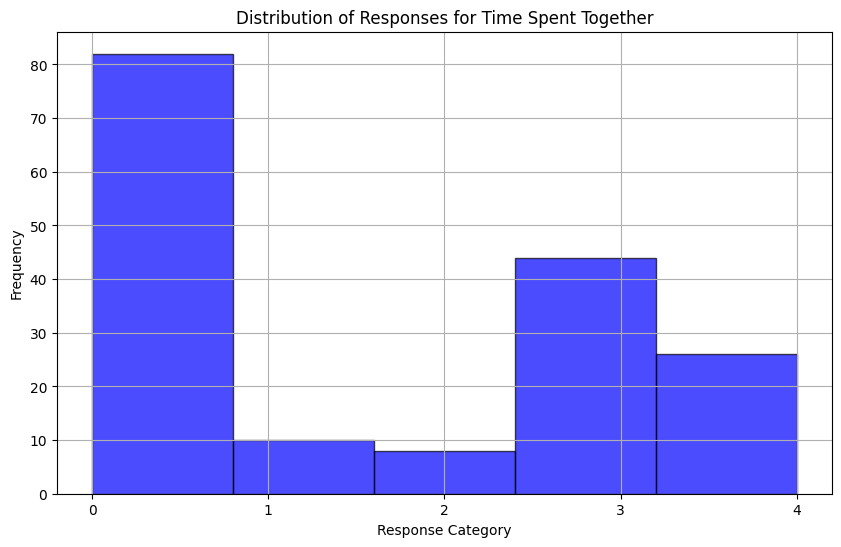

In [5]:
import matplotlib.pyplot as plt

# Histogram of responses for a specific question
plt.figure(figsize=(10, 6))
plt.hist(divorce_df['The time I spent with my wife is special for us.'],
         bins=5, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Responses for Time Spent Together')
plt.xlabel('Response Category')
plt.ylabel('Frequency')
plt.xticks(range(5))  # Assuming responses range from 0 to 4
plt.grid(True)
plt.show()

Correlations with Divorce:
 We don't have time at home as partners.                                                                                   0.420913
Even if I'm right in the discussion, I stay silent to hurt my spouse.                                                     0.443465
We are like two strangers who share the same environment at home rather than family.                                      0.544835
I'd rather stay silent than discuss with my spouse.                                                                       0.546450
I mostly stay silent to calm the environment a little bit.                                                                0.566242
I feel right in our discussions.                                                                                          0.619830
I wouldn't hesitate to tell my spouse about her/his inadequacy.                                                           0.651478
When I discuss with my spouse, I stay silent because I 

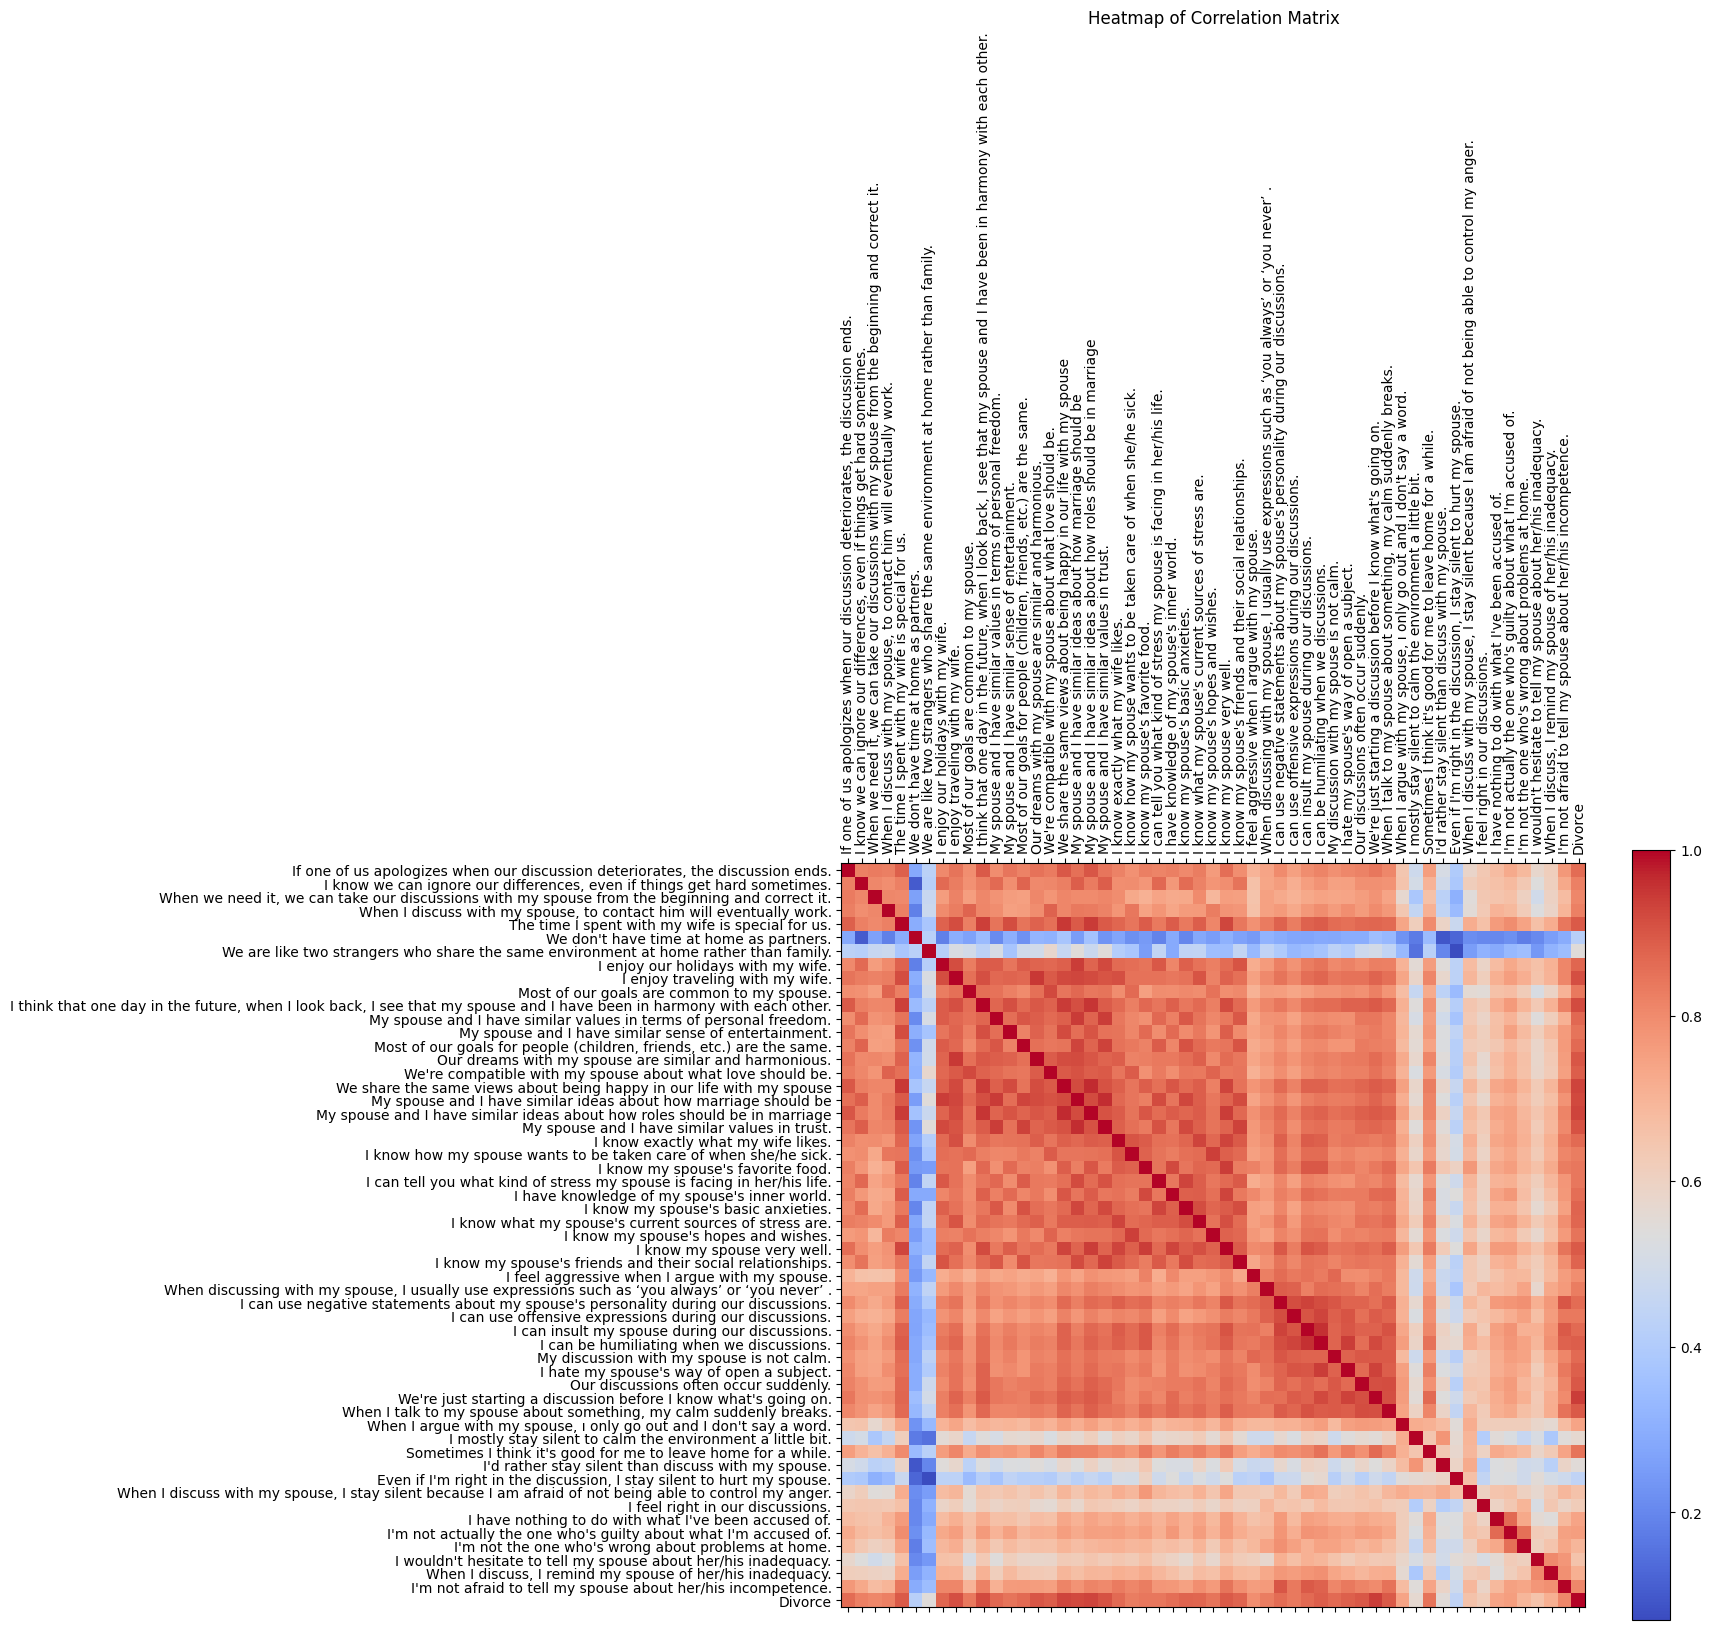

In [6]:
# Correlation Matrix and Heat map
import numpy as np

# Overall correlation of questions with divorce outcome
correlation_matrix = divorce_df.corr()
divorce_correlations = correlation_matrix['Divorce'].sort_values()
print("Correlations with Divorce:\n", divorce_correlations)

# Heatmap of correlations
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

# Set ticks and labels for axes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

plt.title('Heatmap of Correlation Matrix')
plt.show()

#### Statistical Significance Testing

Mann-Whitney U Test for Each Question

For this data, it would be interesting to see if the responses to specific questions differ significantly between those who are divorced and those who are not. The Chi-squared test is commonly used for categorical data, but since the data from the questions are ordinal (ranging from 0-4), we might opt for the Mann-Whitney U test (a nonparametric test that compares differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed).

In [8]:
from scipy.stats import mannwhitneyu

# List to store results
results = []

# Loop over each question column except 'Divorce'
for column in divorce_df.columns[:-1]:  # Assuming 'Divorce' is the last column
    # Split the groups into divorced and not divorced
    group1 = divorce_df[divorce_df['Divorce'] == 1][column]
    group2 = divorce_df[divorce_df['Divorce'] == 0][column]

    # Perform Mann-Whitney U Test
    stat, p_value = mannwhitneyu(group1, group2)

    # Store results with interpretation
    results.append(
        (column, stat, p_value, 'Different' if p_value < 0.05 else 'No Difference'))

# Convert results to DataFrame for easier viewing
test_results = pd.DataFrame(
    results, columns=['Question', 'U Statistic', 'P-Value', 'Interpretation'])

# Display the results
print(test_results)

                                             Question  U Statistic  \
0   If one of us apologizes when our discussion de...       6938.0   
1   I know we can ignore our differences, even if ...       6893.0   
2   When we need it, we can take our discussions w...       6851.0   
3   When I discuss with my spouse, to contact him ...       6875.0   
4    The time I spent with my wife is special for us.       7056.0   
5             We don't have time at home as partners.       5407.5   
6   We are like two strangers who share the same e...       5942.0   
7                  I enjoy our holidays with my wife.       6998.5   
8                     I enjoy traveling with my wife.       7082.5   
9          Most of our goals are common to my spouse.       6964.0   
10  I think that one day in the future, when I loo...       7104.0   
11  My spouse and I have similar values in terms o...       7055.0   
12  My spouse and I have similar sense of entertai...       6974.5   
13  Most of our goal

#### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a technique used to emphasise variation and bring out strong patterns in a dataset. It's especially useful in processing data with many variables to reduce the dimensionality of the dataset while retaining the most variance.


Explained variance ratio: [0.7439942  0.04009844 0.02623175 0.02211211 0.01659722 0.01460921
 0.01293772 0.01102524 0.0105253  0.00979844 0.00793836 0.00722906
 0.0067124  0.00591108 0.00524133 0.00500632 0.0046763 ]


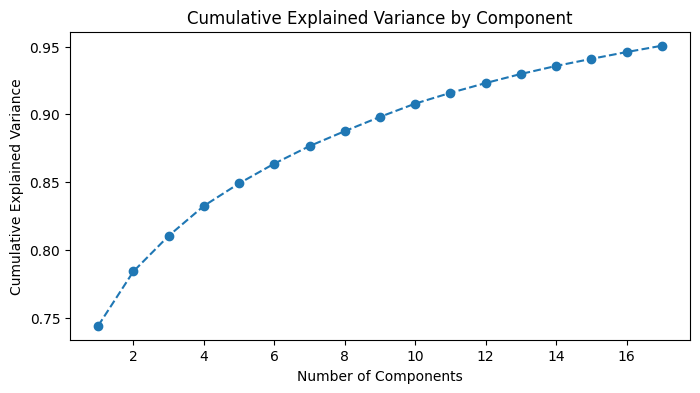

Number of components after PCA: 17


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
X = divorce_df.drop('Divorce', axis=1)
y = divorce_df['Divorce']
# It's important to scale the data for PCA
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Cumulative variance explains
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by Component")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

# How many components are we left with?
print("Number of components after PCA:", pca.n_components_)

#### Feature Importances with Random Forest

Feature: If one of us apologizes when our discussion deteriorates, the discussion ends., Score: 0.00210
Feature: I know we can ignore our differences, even if things get hard sometimes., Score: 0.00117
Feature: When we need it, we can take our discussions with my spouse from the beginning and correct it., Score: 0.00474
Feature: When I discuss with my spouse, to contact him will eventually work., Score: 0.00994
Feature: The time I spent with my wife is special for us., Score: 0.03483
Feature: We don't have time at home as partners., Score: 0.00102
Feature: We are like two strangers who share the same environment at home rather than family., Score: 0.00000
Feature: I enjoy our holidays with my wife., Score: 0.00109
Feature: I enjoy traveling with my wife., Score: 0.04051
Feature: Most of our goals are common to my spouse., Score: 0.00123
Feature: I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other., Score: 0.06269
Feature

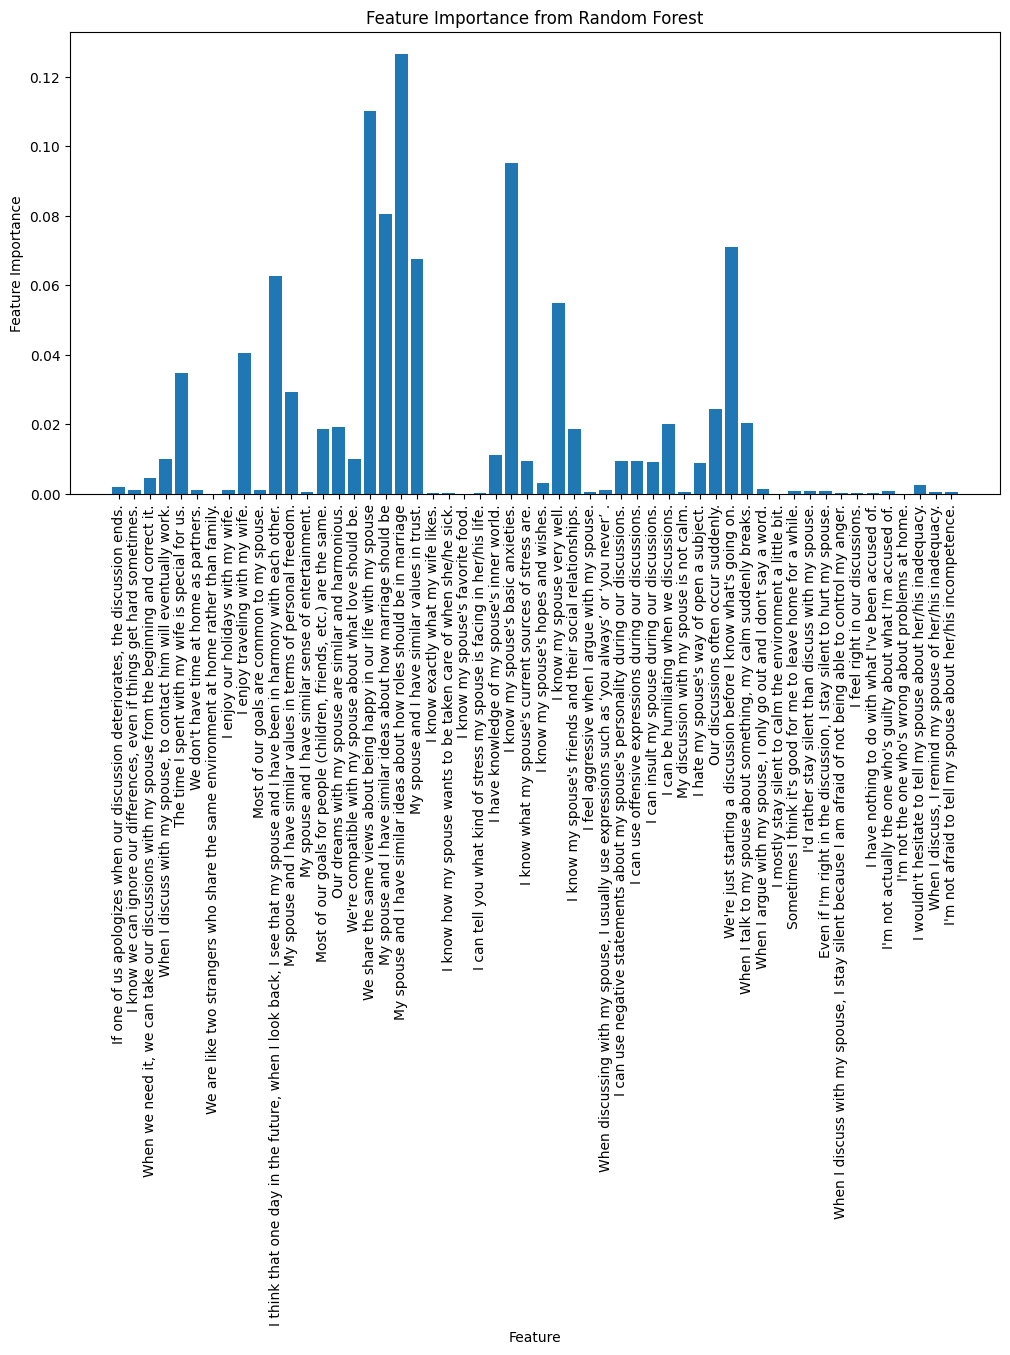

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest for feature importance on a classification problem
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Get importance
importances = model.feature_importances_

# Summarize feature importances
for i, feature in enumerate(X.columns):
    print('Feature: %s, Score: %.5f' % (feature, importances[i]))

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns, importances)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance from Random Forest')
plt.show()

#### Advanced Visualisations

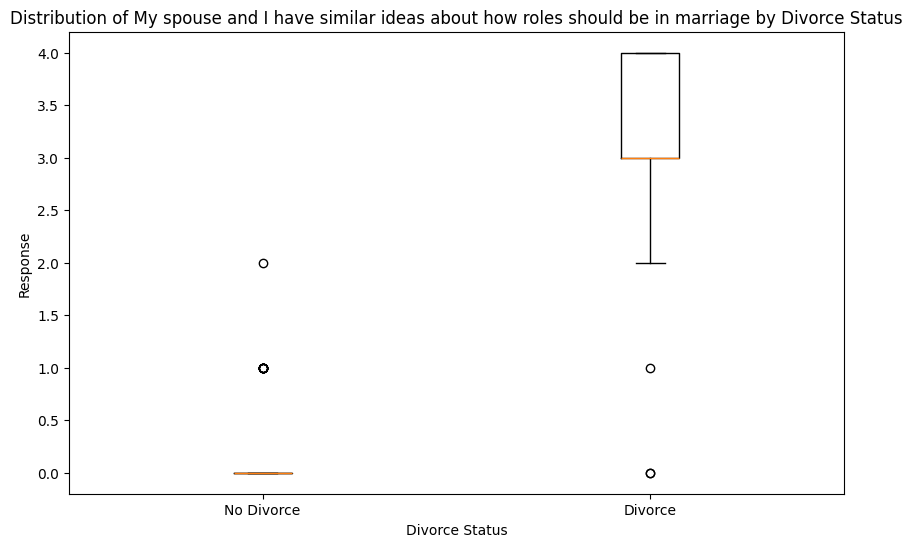

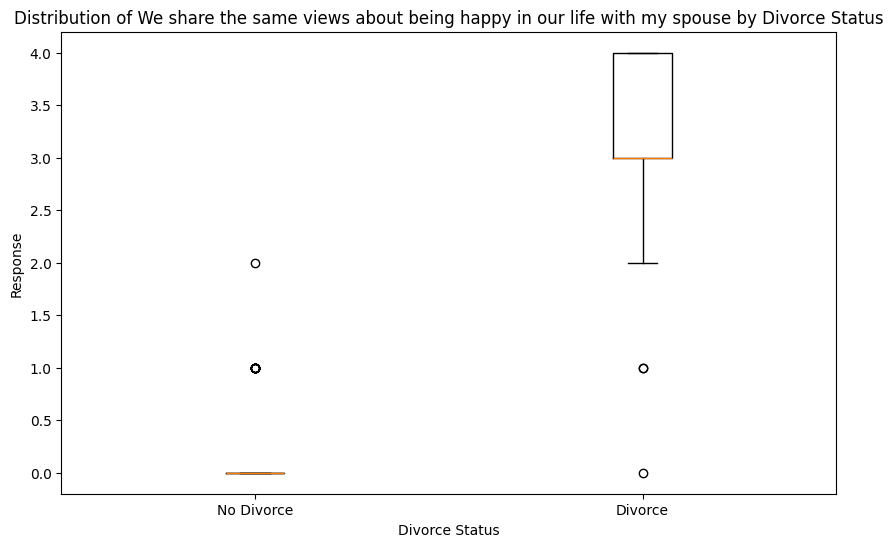

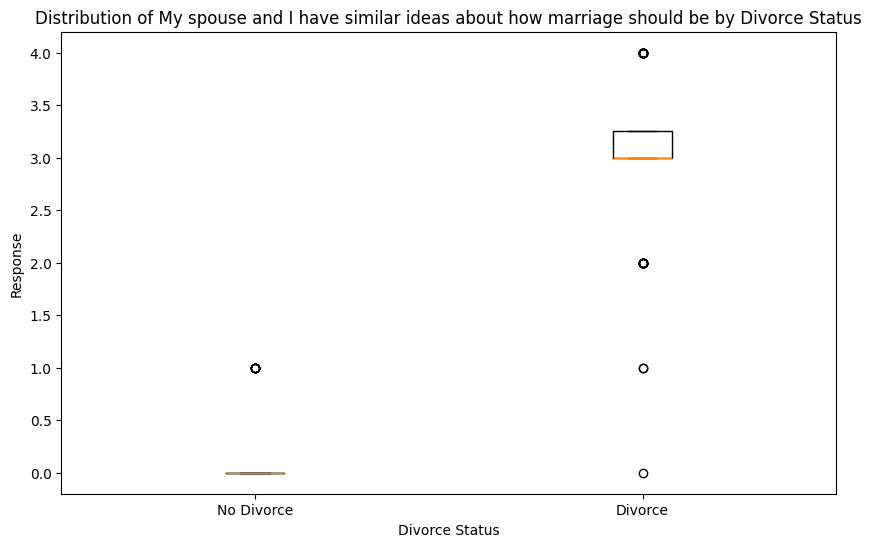

In [12]:
import matplotlib.pyplot as plt

# List of top features based on importance scores
top_features = ["My spouse and I have similar ideas about how roles should be in marriage",
                "We share the same views about being happy in our life with my spouse",
                "My spouse and I have similar ideas about how marriage should be"]

# Create box plots for top features against the Divorce outcome using matplotlib
for feature in top_features:
    plt.figure(figsize=(10, 6))
    # Separate data based on Divorce status
    data_no_divorce = divorce_df[divorce_df['Divorce'] == 0][feature]
    data_divorce = divorce_df[divorce_df['Divorce'] == 1][feature]

    # Prepare data for plotting
    data_to_plot = [data_no_divorce, data_divorce]

    # Create the boxplot
    plt.boxplot(data_to_plot, labels=['No Divorce', 'Divorce'])
    plt.title(f'Distribution of {feature} by Divorce Status')
    plt.xlabel('Divorce Status')
    plt.ylabel('Response')
    plt.show()

#### Focused Predictive Modeling Using Top Features

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Select top features for modeling
X = divorce_df[top_features]
y = divorce_df['Divorce']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Model Evaluation
print(classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        23

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Confusion Matrix:
 [[20  0]
 [ 0 23]]


#### Cross-Validation

In [14]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to evaluate the model
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())

Cross-validated scores: [0.88235294 1.         1.         1.         1.        ]
Average score: 0.9764705882352942
